<a href="https://colab.research.google.com/github/MalikaIT21277122/ML-assignment/blob/knn_model/KNN_ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Prediction using K-Nearest Neighbors (KNN)**

Name:         Withanagamage J.C.

Student No:   IT21250156

This script implements a KNN classifier to predict heart disease using the Cleveland Heart Disease dataset. It includes:
* Data preprocessing and exploratory analysis
* KNN classifier implementation with cross-validation
* Hyperparameter tuning (optimal k selection)
* Performance evaluation using multiple metrics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/heart.csv'

### *Data Loading and Initial Exploration*

In [ ]:
# Load the dataset
df = pd.read_csv(file_path)

In [ ]:
# Display basic information about the dataset
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset information:")
print(df.info())

print("\nStatistical summary:")
print(df.describe())

First 5 rows of the dataset:
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4      

### *Data Preprocessing*

In [ ]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [ ]:
# Create target variable from 'num' column
# 0 = No heart disease, 1 = Heart disease present
df['target'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
# Display class distribution
print("\nTarget variable distribution:")
print(df['target'].value_counts())
print(f"Percentage of positive cases: {df['target'].mean()*100:.2f}%")


Target variable distribution:
target
1    509
0    411
Name: count, dtype: int64
Percentage of positive cases: 55.33%


In [ ]:
# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

### *Exploratory Data Analysis*

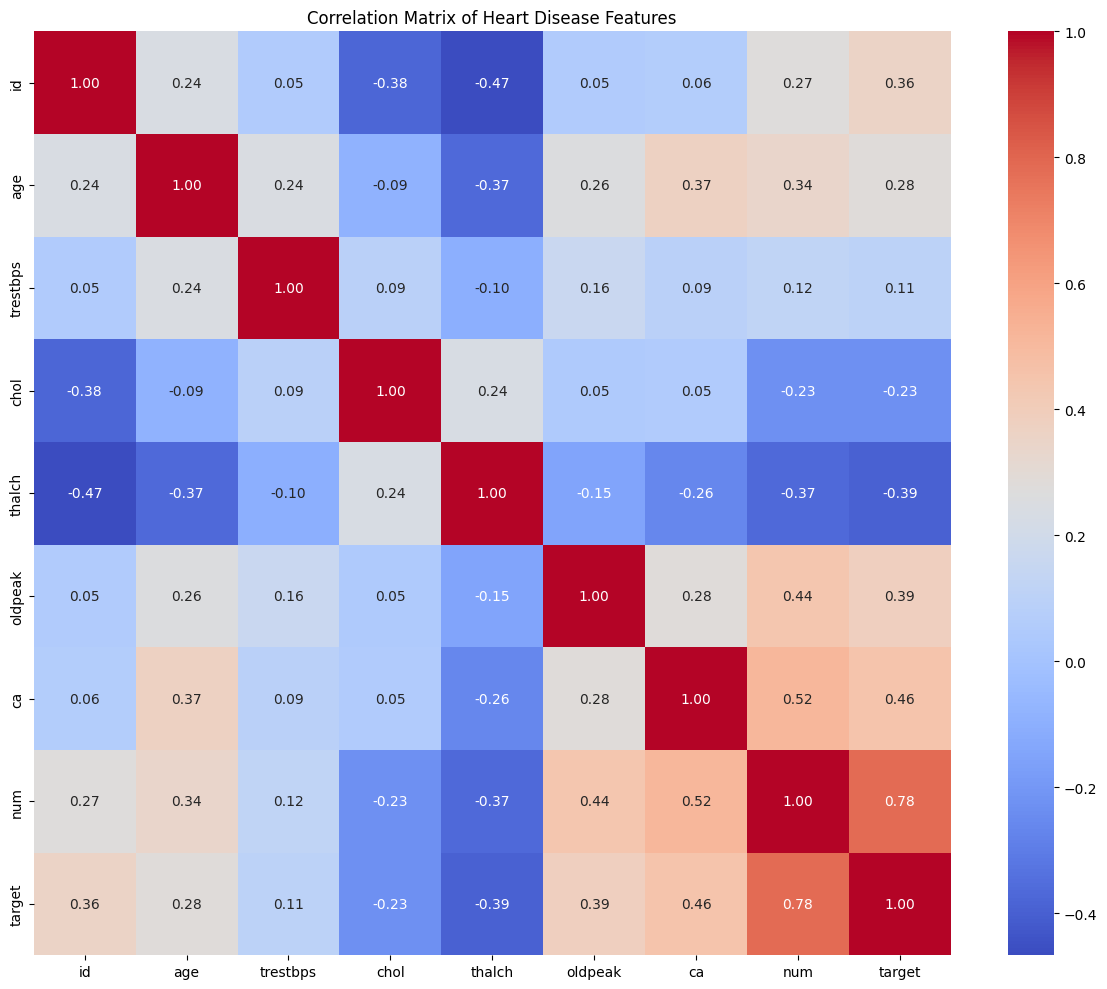

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 10))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Heart Disease Features')
plt.tight_layout()
plt.show()

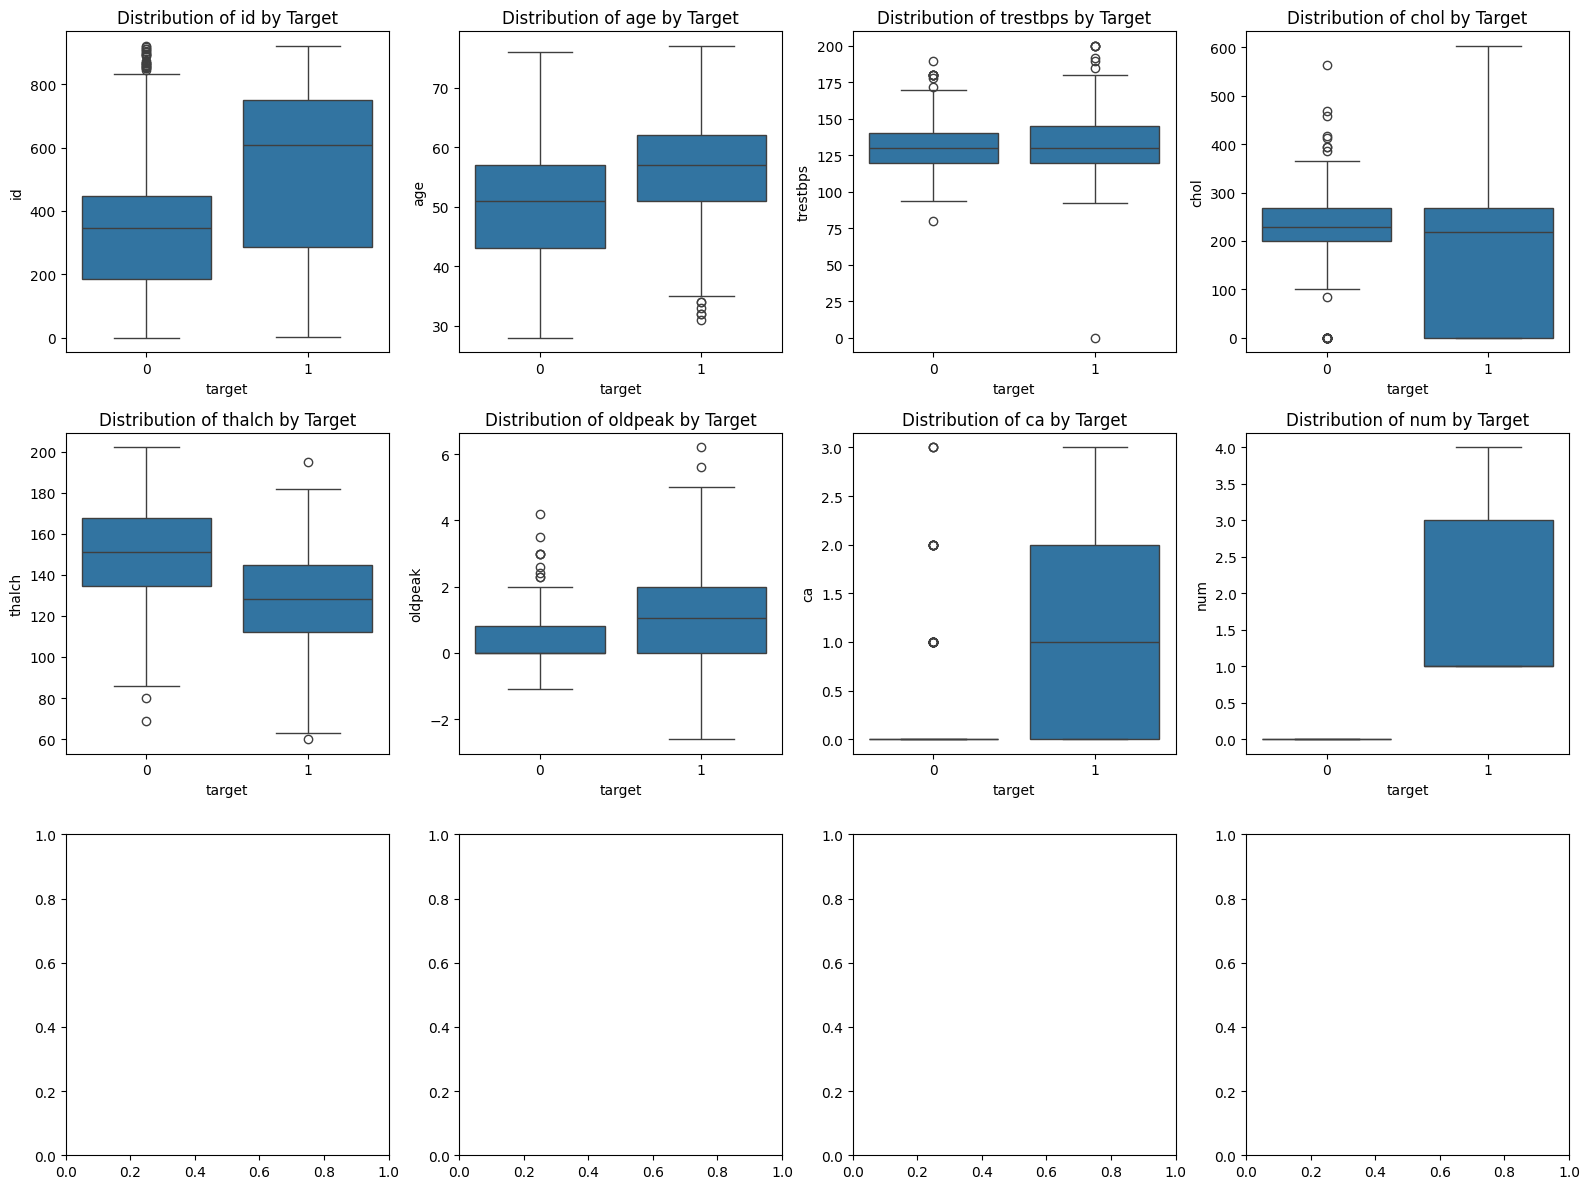

In [ ]:
# Distribution of numerical features by target class
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    if i < len(axes):
        sns.boxplot(x='target', y=feature, data=df, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature} by Target')

plt.tight_layout()
plt.show()

### *Feature Engineering and Preprocessing*

In [ ]:
# Encode categorical variables
encoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = encoder.fit_transform(X[col])

In [ ]:
# Clean data (drop rows with NaN values)
X_cleaned = X.dropna()
y_cleaned = y[X_cleaned.index]

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

In [ ]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_cleaned, test_size=0.2, random_state=42
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (246, 16)
Testing set shape: (62, 16)


### *KNN Model Implementation*

In [ ]:
# Initial KNN model with k=5 (default starting point)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

### *Model Evaluation*

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")


Model Accuracy: 0.8548


In [ ]:
# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87        34
           1       0.88      0.79      0.83        28

    accuracy                           0.85        62
   macro avg       0.86      0.85      0.85        62
weighted avg       0.86      0.85      0.85        62



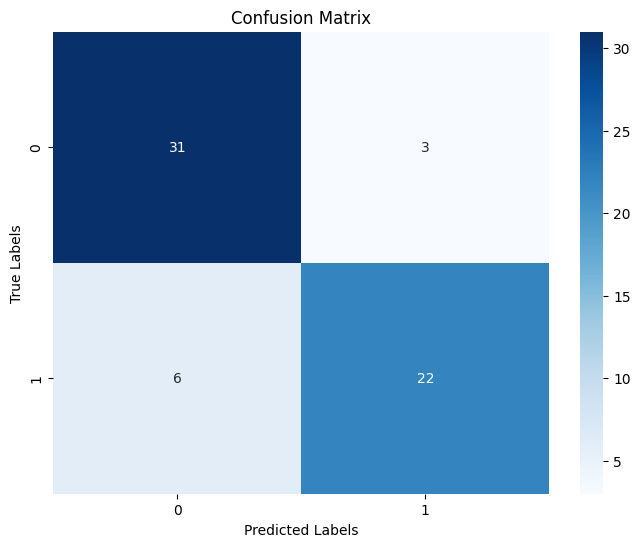

In [ ]:
# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

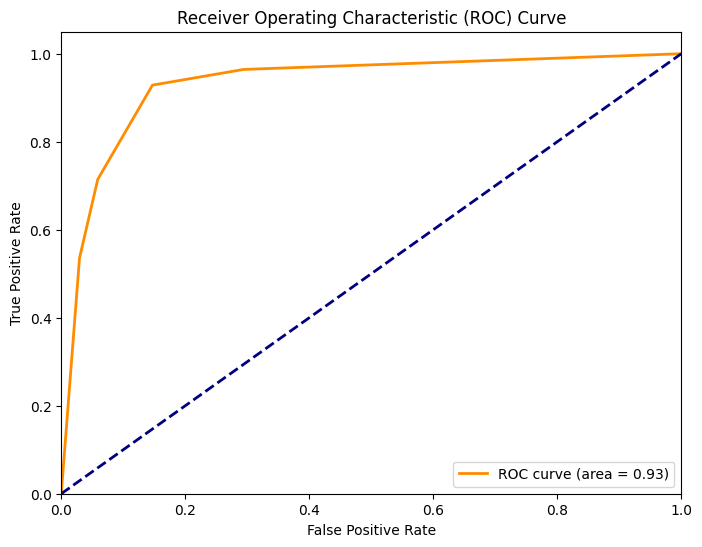

In [ ]:
# Plot ROC curve
y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### *Hyperparameter Tuning: Finding Optimal K*

In [ ]:
# Test a range of k values to find the optimal one
k_range = range(1, 21)
error_rate = []
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Get cross-validation scores
    scores = cross_val_score(knn, X_scaled, y_cleaned, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

    # Train and evaluate on test set
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))

Text(0, 0.5, 'Error Rate')

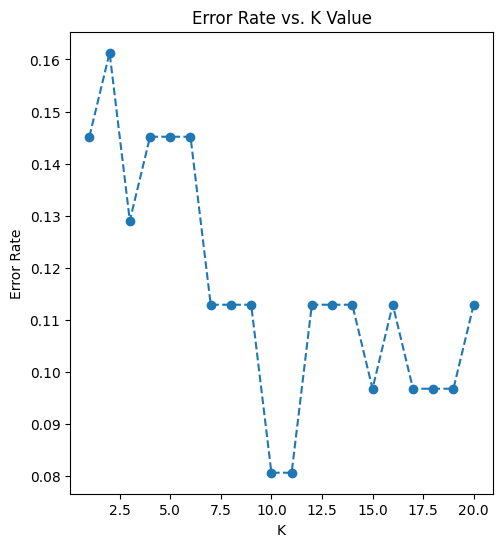

In [ ]:
# Plot error rate vs. k value
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_range, error_rate, marker='o', linestyle='--')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

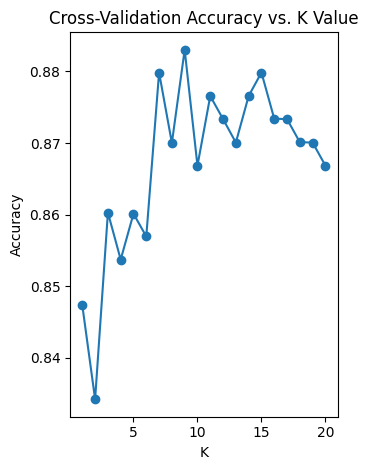

In [ ]:
# Plot cross-validation accuracy vs. k value
plt.subplot(1, 2, 2)
plt.plot(k_range, cv_scores, marker='o', linestyle='-')
plt.title('Cross-Validation Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [ ]:
# Find the k value with the highest CV accuracy
optimal_k = k_range[np.argmax(cv_scores)]
print(f"\nOptimal K value based on cross-validation: {optimal_k}")


Optimal K value based on cross-validation: 9


In [ ]:
# Train final model with optimal k
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(X_train, y_train)
final_pred = final_knn.predict(X_test)

In [ ]:
# Evaluate final model
final_accuracy = accuracy_score(y_test, final_pred)
print(f"\nFinal Model Accuracy with k={optimal_k}: {final_accuracy:.4f}")
print("\nFinal Classification Report:")
print(classification_report(y_test, final_pred))


Final Model Accuracy with k=9: 0.8871

Final Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        34
           1       0.89      0.86      0.87        28

    accuracy                           0.89        62
   macro avg       0.89      0.88      0.89        62
weighted avg       0.89      0.89      0.89        62



### *Additional Analysis: Testing Different Distance Metrics*

In [ ]:
# Test different distance metrics
distance_metrics = ['euclidean', 'manhattan', 'minkowski']
metric_scores = []

for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=metric)
    scores = cross_val_score(knn, X_scaled, y_cleaned, cv=5, scoring='accuracy')
    metric_scores.append(scores.mean())
    print(f"Mean cross-validation accuracy with {metric} distance: {scores.mean():.4f}")


Mean cross-validation accuracy with euclidean distance: 0.8830
Mean cross-validation accuracy with manhattan distance: 0.8960
Mean cross-validation accuracy with minkowski distance: 0.8830


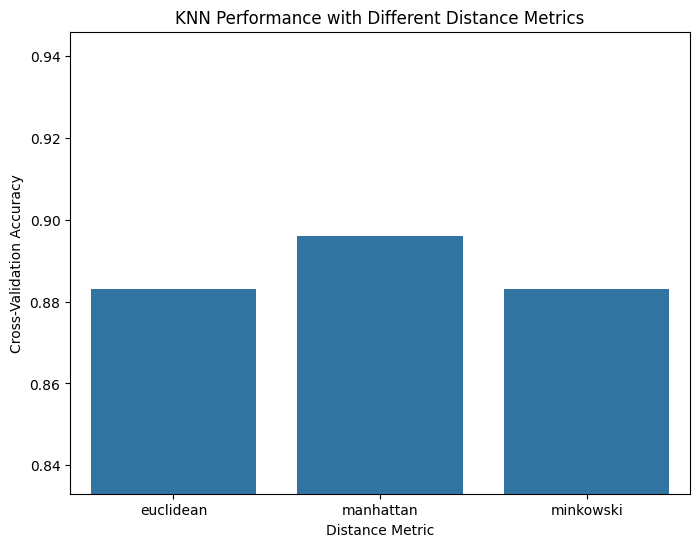

In [ ]:
# Plot distance metric comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=distance_metrics, y=metric_scores)
plt.title('KNN Performance with Different Distance Metrics')
plt.xlabel('Distance Metric')
plt.ylabel('Cross-Validation Accuracy')
plt.ylim(min(metric_scores) - 0.05, max(metric_scores) + 0.05)
plt.show()